In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

#Team Stats

In [100]:
df = pd.read_csv('/content/team_passing_stats.csv')
df

,Team,Possession (%),Passing accuracy (%),Passes completed,Passes attempted,Short passes completed,Medium passes completed,Long passes completed,Backward passes completed,Passes completed to left,Passes completed to right,Free-kicks taken,Passes into attacking third,Passes into key play area,Passes into penalty area,Crossing accuracy (%),Crosses completed,Crosses attempted,Times in possession
0,Antwerp,53,87,461,530,60,353,48,111,110,132,8,29,22,9,8,1,12,180
1,Shakhtar,47,86,402,469,61,305,36,74,119,110,10,31,23,15,33,3,9,175


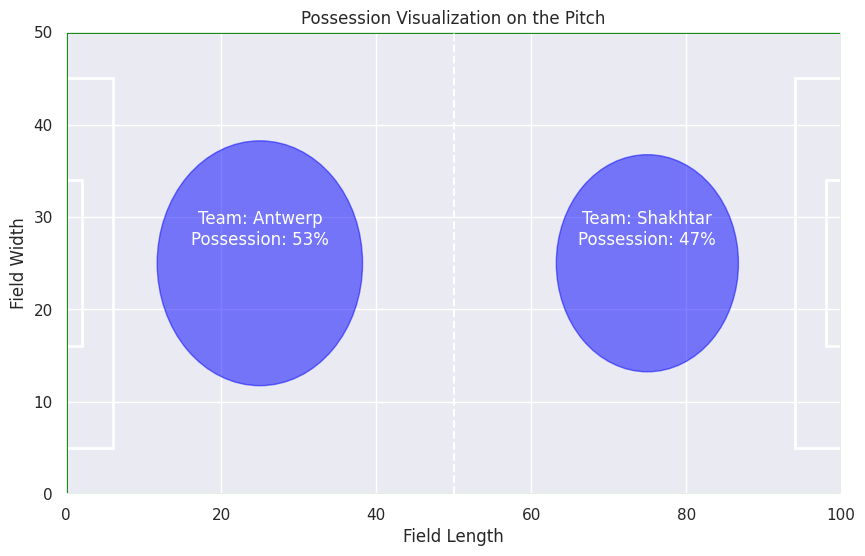

In [101]:
data = {
    'Team': ['Antwerp', 'Shakhtar'],
    'Possession (%)': [53, 47],
}

df = pd.DataFrame(data)
fig, ax = plt.subplots(figsize=(10, 6))

field_length = 100
field_width = 50

ax.plot([0, field_length, field_length, 0, 0], [0, 0, field_width, field_width, 0], color='green', linewidth=2)

ax.plot([field_length / 2, field_length / 2], [0, field_width], color='white', linestyle='dashed')

ax.add_patch(patches.Rectangle((0, (field_width - 40) / 2), 6, 40, linewidth=2, edgecolor='white', facecolor='none'))
ax.add_patch(patches.Rectangle((field_length - 6, (field_width - 40) / 2), 6, 40, linewidth=2, edgecolor='white', facecolor='none'))

ax.add_patch(patches.Rectangle((0, (field_width - 18) / 2), 2, 18, linewidth=2, edgecolor='white', facecolor='none'))
ax.add_patch(patches.Rectangle((field_length - 2, (field_width - 18) / 2), 2, 18, linewidth=2, edgecolor='white', facecolor='none'))

for index, row in df.iterrows():
    x_position = (field_length / 4) + (index * field_length / 2)
    y_position = field_width / 2

    possession_percentage = row['Possession (%)']

    circle = plt.Circle((x_position, y_position), possession_percentage / 4, color='blue', alpha=0.5)
    ax.add_patch(circle)

    ax.text(x_position, y_position + 2, f'Team: {row["Team"]}\nPossession: {possession_percentage}%', color='white', ha='center')

ax.set_xlim(0, field_length)
ax.set_ylim(0, field_width)

ax.set_xlabel('Field Length')
ax.set_ylabel('Field Width')
ax.set_title('Possession Visualization on the Pitch')

# Show the plot
plt.show()


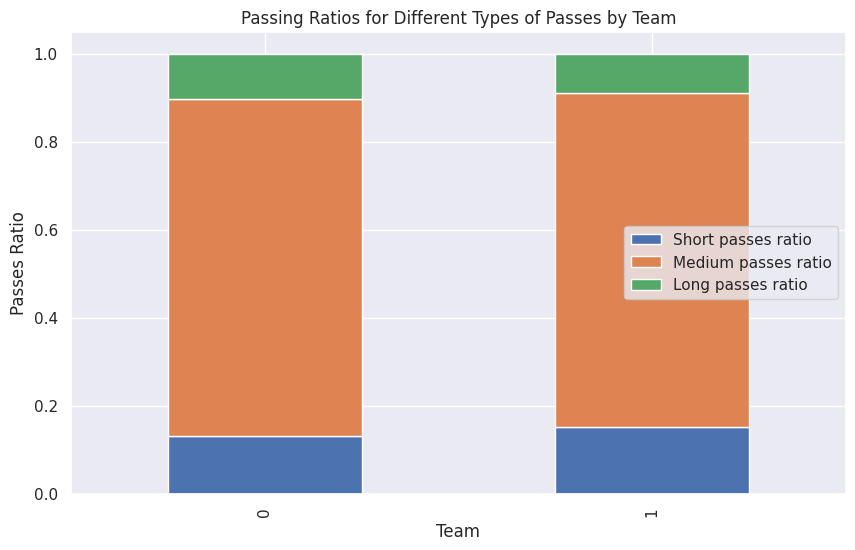

In [102]:
data = {
    'Team': ['Antwerp', 'Shakhtar'],
    'Short passes completed': [60, 61],
    'Medium passes completed': [353, 305],
    'Long passes completed': [48, 36],
}

df = pd.DataFrame(data)

df['Short passes ratio'] = df['Short passes completed'] / df[['Short passes completed', 'Medium passes completed', 'Long passes completed']].sum(axis=1)
df['Medium passes ratio'] = df['Medium passes completed'] / df[['Short passes completed', 'Medium passes completed', 'Long passes completed']].sum(axis=1)
df['Long passes ratio'] = df['Long passes completed'] / df[['Short passes completed', 'Medium passes completed', 'Long passes completed']].sum(axis=1)

fig, ax = plt.subplots(figsize=(10, 6))

df[['Short passes ratio', 'Medium passes ratio', 'Long passes ratio']].plot(kind='bar', stacked=True, ax=ax)

plt.xlabel('Team')
plt.ylabel('Passes Ratio')
plt.title('Passing Ratios for Different Types of Passes by Team')

plt.show()

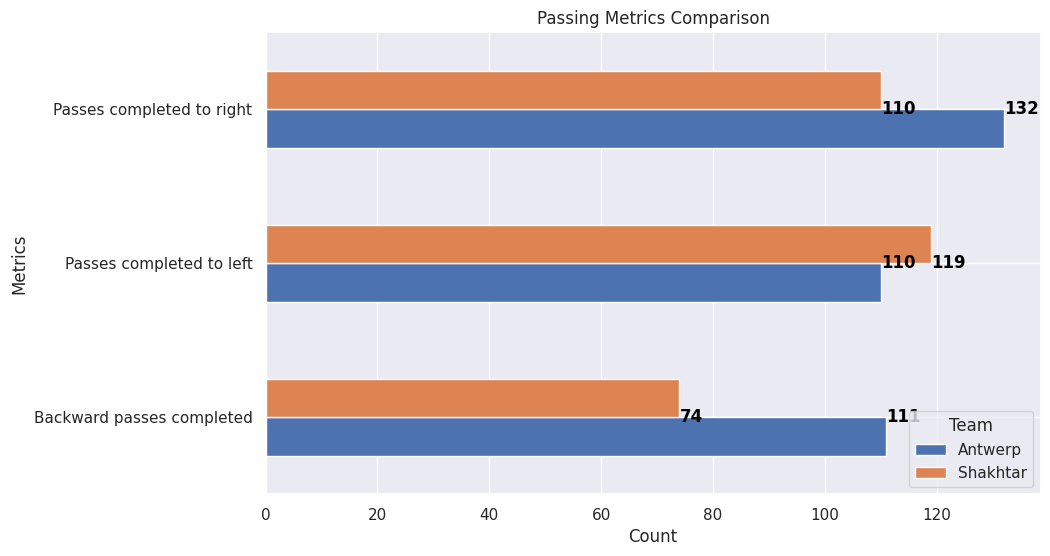

In [103]:
data = {
    'Team': ['Antwerp', 'Shakhtar'],
    'Backward passes completed': [111, 74],
    'Passes completed to left': [110, 119],
    'Passes completed to right': [132, 110],
}

df = pd.DataFrame(data)

df.set_index('Team', inplace=True)
df = df.T

ax = df.plot(kind='barh', figsize=(10, 6))

for team in df.columns:
    for index, value in enumerate(df[team]):
        ax.text(value, index, f'{value}', ha='left', va='center', color='black', fontweight='bold')

plt.xlabel('Count')
plt.ylabel('Metrics')
plt.title('Passing Metrics Comparison')

# Show the plot
plt.show()

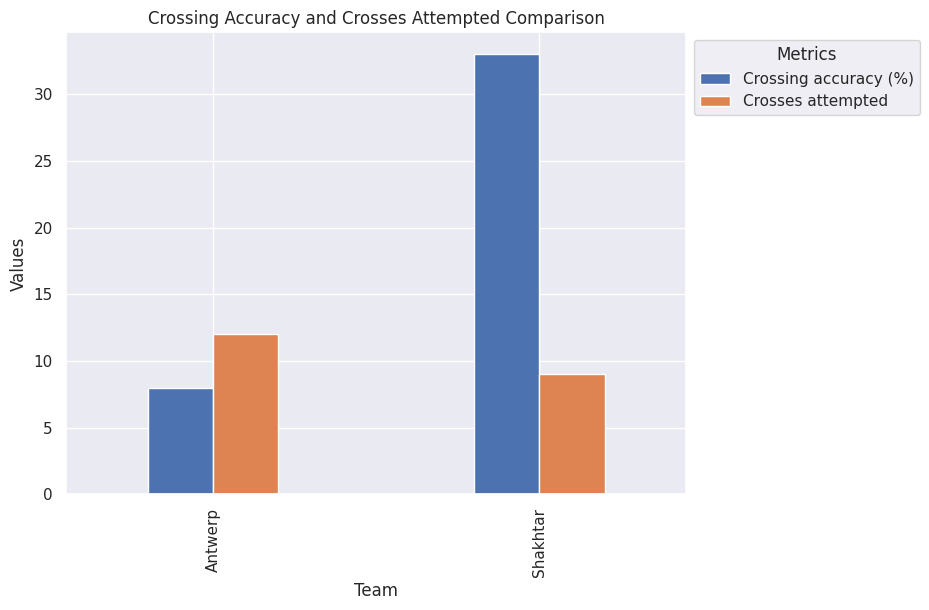

In [104]:
data = {
    'Team': ['Antwerp', 'Shakhtar'],
    'Crossing accuracy (%)': [8, 33],
    'Crosses attempted': [12, 9],
}

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(8, 6))

df.set_index('Team').plot(kind='bar', ax=ax, width=0.4)
ax.set_ylabel('Values')
ax.set_xlabel('Team')
ax.set_title('Crossing Accuracy and Crosses Attempted Comparison')

plt.legend(title='Metrics', bbox_to_anchor=(1, 1))
plt.show()

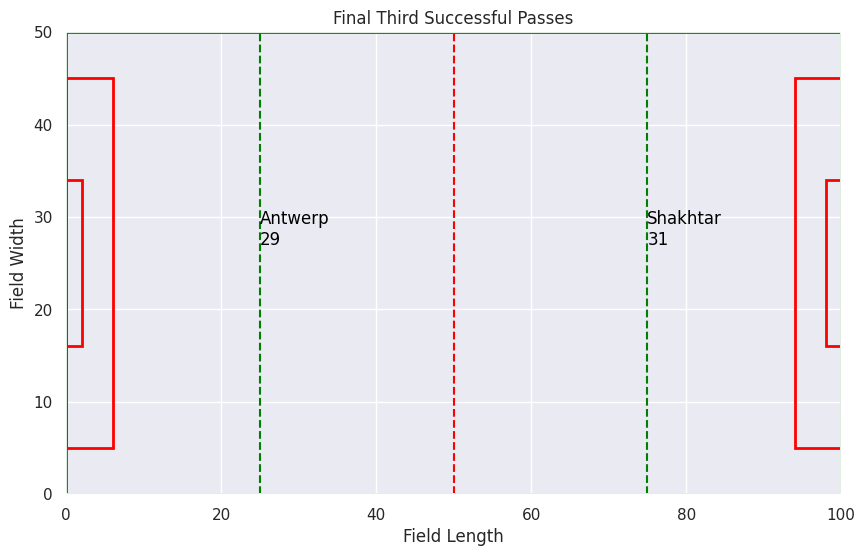

In [105]:
data = {
    'Team': ['Antwerp', 'Shakhtar'],
    'Passes into attacking third': [29, 31],
    'Passes attempted': [530, 469],
}

df = pd.DataFrame(data)

df['Attacking third percentage'] = (df['Passes into attacking third'] / df['Passes attempted']) * 100

# Plot the football pitch
fig, ax = plt.subplots(figsize=(10, 6))

field_length = 100
field_width = 50

ax.plot([0, field_length, field_length, 0, 0], [0, 0, field_width, field_width, 0], color='green', linewidth=2)

ax.plot([field_length / 2, field_length / 2], [0, field_width], color='red', linestyle='dashed')  # Change color to red

ax.add_patch(patches.Rectangle((0, (field_width - 40) / 2), 6, 40, linewidth=2, edgecolor='red', facecolor='none'))  # Change edgecolor to red
ax.add_patch(patches.Rectangle((field_length - 6, (field_width - 40) / 2), 6, 40, linewidth=2, edgecolor='red', facecolor='none'))  # Change edgecolor to red

ax.add_patch(patches.Rectangle((0, (field_width - 18) / 2), 2, 18, linewidth=2, edgecolor='red', facecolor='none'))  # Change edgecolor to red
ax.add_patch(patches.Rectangle((field_length - 2, (field_width - 18) / 2), 2, 18, linewidth=2, edgecolor='red', facecolor='none'))  # Change edgecolor to red

for index, row in df.iterrows():
    x_position = field_length / 4 if index == 0 else (3 * field_length) / 4
    y_position = field_width / 2

    att_third_percentage = row['Attacking third percentage']

    # Draw the line to the final third
    ax.plot([x_position, x_position], [0, field_width], color='green', linestyle='dashed')

    # Add the text with the statistics and change font color to red
    ax.text(x_position, y_position + 2, f'{row["Team"]}\n{row["Passes into attacking third"]}', color='black', ha='left')

ax.set_xlim(0, field_length)
ax.set_ylim(0, field_width)

ax.set_xlabel('Field Length')
ax.set_ylabel('Field Width')
ax.set_title('Final Third Successful Passes')

plt.show()


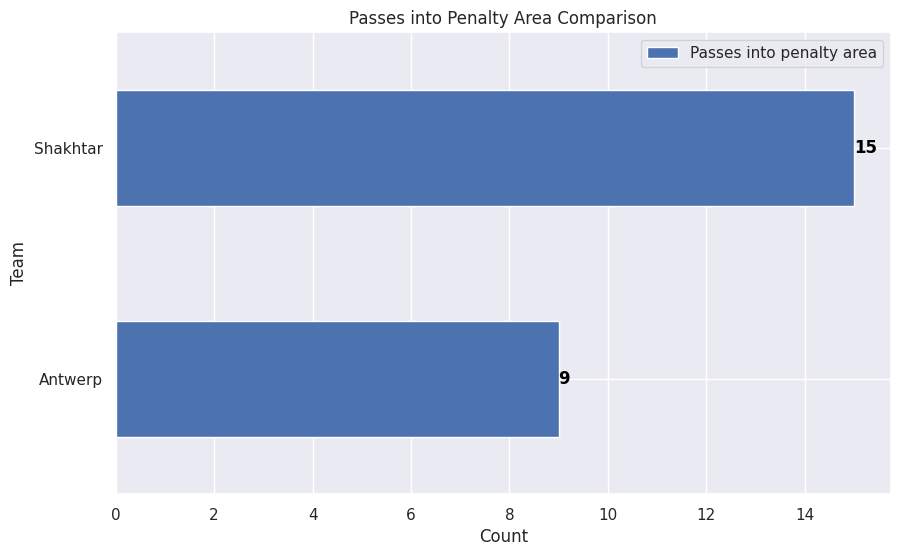

In [106]:
data = {
    'Team': ['Antwerp', 'Shakhtar'],
    'Passes into penalty area': [9, 15],
}

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(10, 6))

df.plot(kind='barh', y='Passes into penalty area', x='Team', ax=ax)

for index, value in enumerate(df['Passes into penalty area']):
    ax.text(value, index, f'{value}', ha='left', va='center', color='black', fontweight='bold')

plt.xlabel('Count')
plt.ylabel('Team')
plt.title('Passes into Penalty Area Comparison')

plt.show()

#Individual Stats

In [107]:
df_individual = pd.read_csv('/content/individual_passing_stats.csv')
df_individual

,Player,Touches,Accurate passes,Assists,xA,Chances created,Passes into final third,Accurate crosses,Accurate long balls
0,Toby Alderweireld,102,71,0,"0,2",1,15,0,8
1,Soumaila Coulibaly,88,74,0,"0,01",0,3,0,2
2,Yaroslav Rakitskiy,82,58,0,"0,71",1,9,0,4
3,Jelle Bataille,78,44,0,"0,08",0,10,2,4
4,Yukhym Konoplia,73,38,0,"0,35",0,4,0,0
5,Mykola Matviyenko,72,55,0,"0,01",0,2,0,5
6,Jean Butez,69,42,0,0,0,0,0,11
7,Yegor Nazaryna,65,44,1,"0,44",1,5,1,0
8,Georgiy Sudakov,63,39,0,"0,14",1,9,0,3
9,Arthur Vermeeren,61,39,2,"0,22",2,3,1,1


In [108]:
df_individual['xA']= [0.2, 0.01, 0.71, 0.08, 0.35, 0.01, 0, 0.44, 0.14, 0.22, 0.26, 0.01, 0.03, 0.08, 0.02, 0.07, 0.02, 0.31, 0, 0.02, 0.02, 0.11, 0, 0, 0.02, 0.01, 0]

In [109]:
df_individual['xA'] = df_individual['xA'].astype(float)

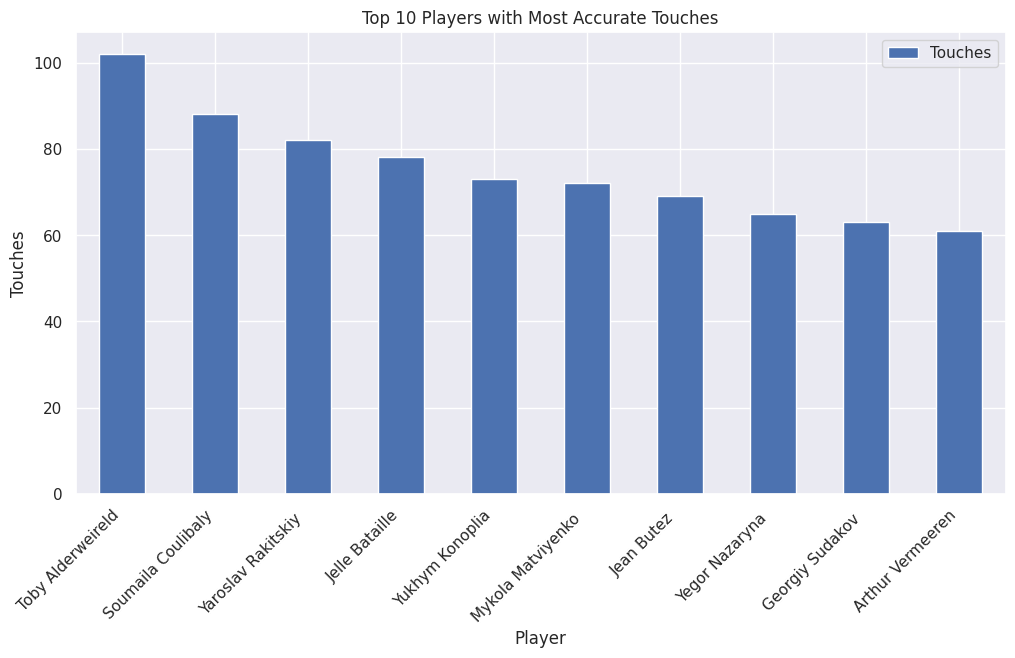

In [110]:
top_10_touches = df_individual.nlargest(10, 'Touches')

fig, ax = plt.subplots(figsize=(12, 6))
top_10_touches.plot(kind='bar', y='Touches', x='Player', ax=ax)
plt.title('Top 10 Players with Most Accurate Touches')
plt.xlabel('Player')
plt.ylabel('Touches')
plt.xticks(rotation=45, ha='right')
plt.show()


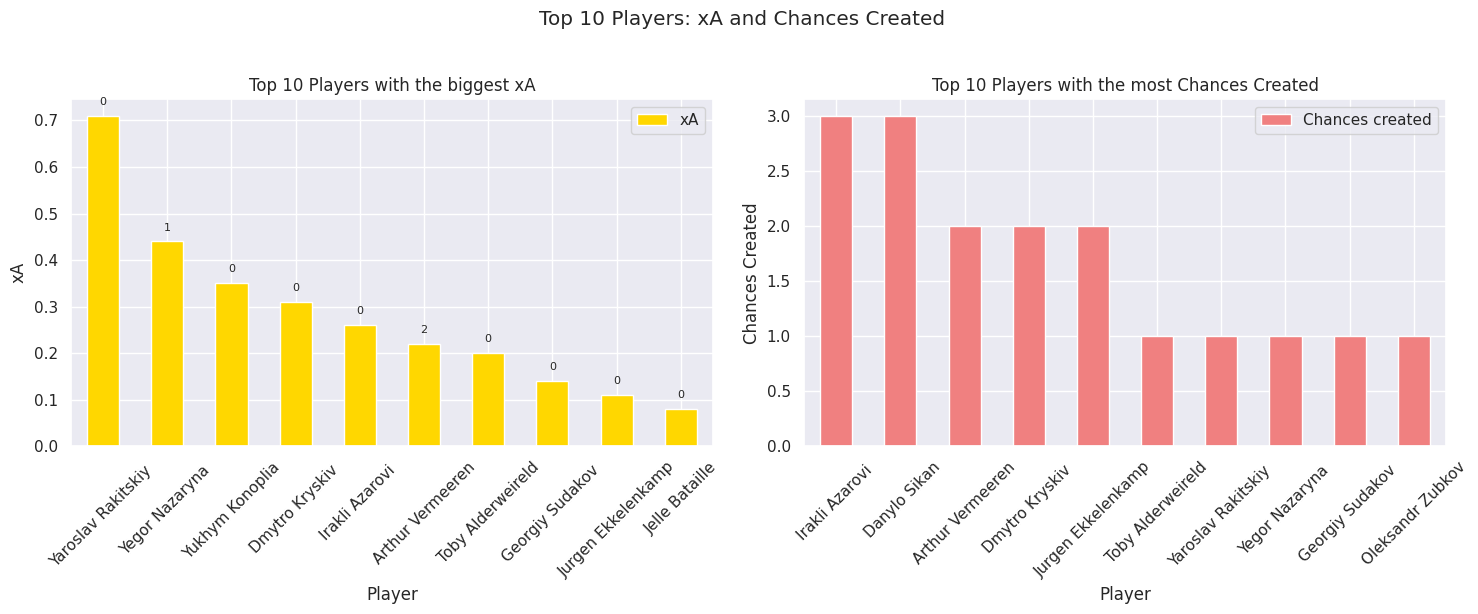

In [111]:
df_individual['xA'] = df_individual['xA'].astype(float)

top_10_xa = df_individual.nlargest(10, 'xA')


top_10_chances_created = df_individual.nlargest(10, 'Chances created')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
fig.suptitle('Top 10 Players: xA and Chances Created', y=1.02)

xa_plot = top_10_xa.plot(kind='bar', y='xA', x='Player', color='gold', ax=axes[0])
axes[0].set_title('Top 10 Players with the biggest xA')
axes[0].set_xlabel('Player')
axes[0].set_ylabel('xA')
axes[0].tick_params(axis='x', rotation=45)

# Annotate bars with the number of assists
for i, p in enumerate(xa_plot.patches):
    xa_plot.annotate(f"{top_10_xa.iloc[i]['Assists']}",
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10),
                     textcoords='offset points', fontsize=8)

top_10_chances_created.plot(kind='bar', y='Chances created', x='Player', color='lightcoral', ax=axes[1])
axes[1].set_title('Top 10 Players with the most Chances Created')
axes[1].set_xlabel('Player')
axes[1].set_ylabel('Chances Created')
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


Upon the bars of the xA plot, we can see the number of assists in the end

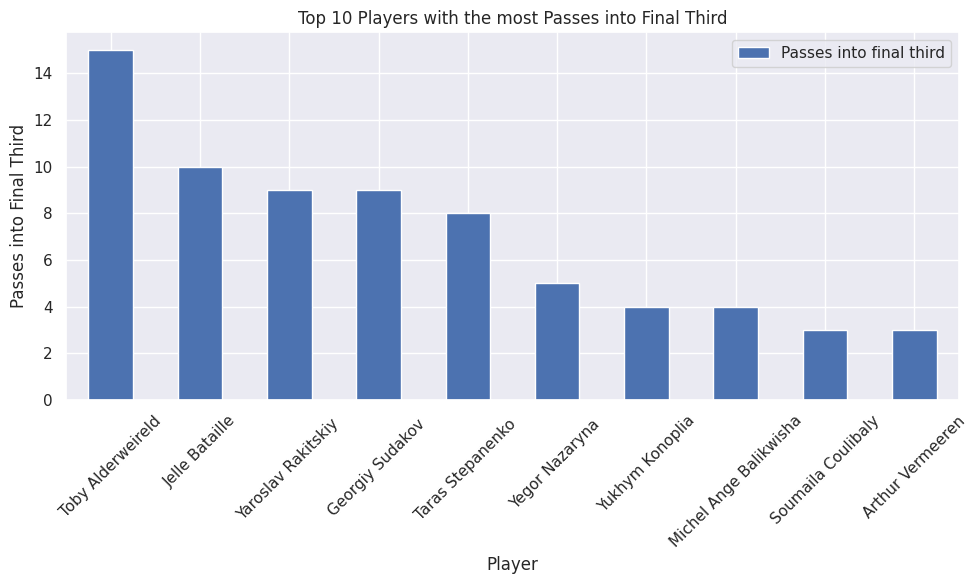

In [112]:
top_10_passes_final_third = df_individual.nlargest(10, 'Passes into final third')

fig, ax = plt.subplots(figsize=(10, 6))
top_10_passes_final_third.plot(kind='bar', y='Passes into final third', x='Player', ax=ax)
ax.set_title('Top 10 Players with the most Passes into Final Third')
ax.set_xlabel('Player')
ax.set_ylabel('Passes into Final Third')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

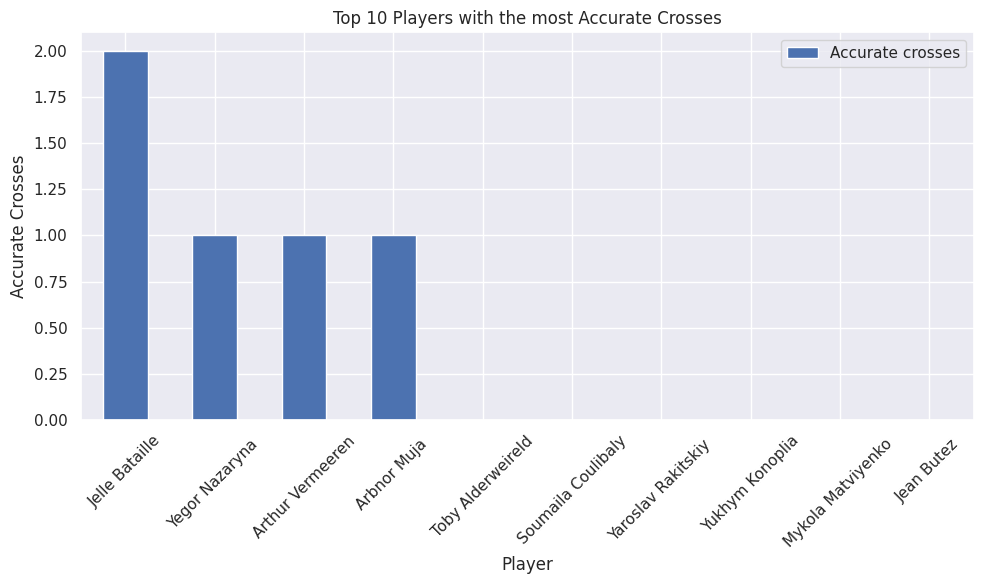

In [113]:
top_10_crosses = df_individual.nlargest(10, 'Accurate crosses')

fig, ax = plt.subplots(figsize=(10, 6))
top_10_crosses.plot(kind='bar', y='Accurate crosses', x='Player', ax=ax)
ax.set_title('Top 10 Players with the most Accurate Crosses')
ax.set_xlabel('Player')
ax.set_ylabel('Accurate Crosses')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


Not that much players got accurate crosses

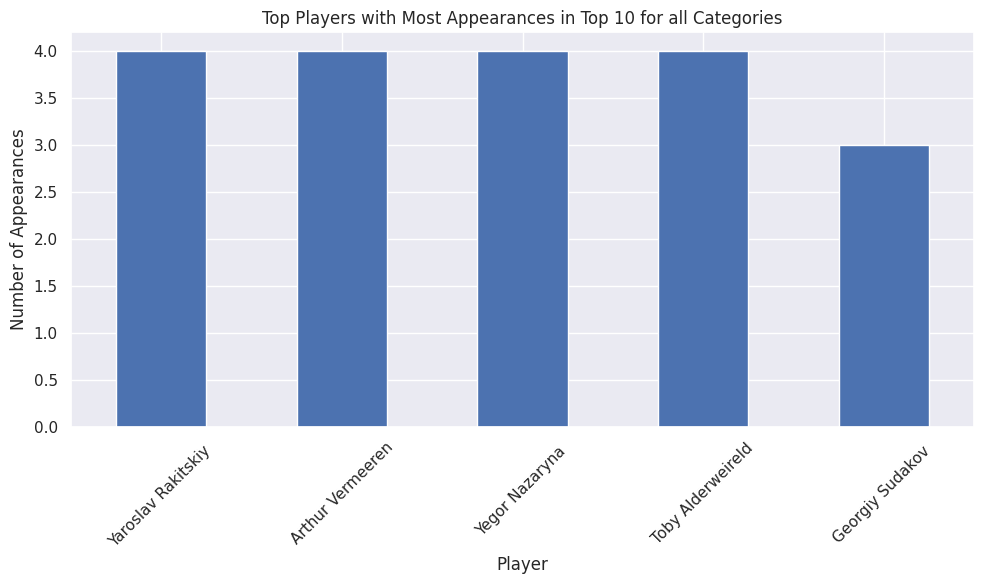

In [114]:
df_individual['xA'] = df_individual['xA'].astype(float)

# Select top 10 players for each category
top_10_xa = df_individual.nlargest(10, 'xA')
top_10_chances_created = df_individual.nlargest(10, 'Chances created')
top_10_passes_final_third = df_individual.nlargest(10, 'Passes into final third')
top_10_crosses = df_individual.nlargest(10, 'Accurate crosses')

top_10_players = pd.concat([top_10_xa, top_10_chances_created, top_10_passes_final_third, top_10_crosses])

player_counts = top_10_players['Player'].value_counts()

top_5_players = player_counts.head(5)

# Plot the top 5 players with the most appearances
fig, ax = plt.subplots(figsize=(10, 6))
top_5_players.plot(kind='bar', ax=ax)
ax.set_title('Top Players with Most Appearances in Top 10 for all Categories')
ax.set_xlabel('Player')
ax.set_ylabel('Number of Appearances')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
